In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np

# Importar DataSet con datos Limpios

In [2]:
Ruta = r"C:\Users\Luis Sazo\Desktop\Análisis Notas Estudiantes\Data\NotasEstudiantesLimpio.csv"
NotasEstudiantesDF = pd.read_csv(Ruta)
NotasEstudiantesDF.head(10)

,ID,Género,Grupo Étnico,Nivel Educativo Padres,Tipo De Almuerzo,Preparación Para Examen,Nota Matemáticas,Nota Lectura,Nota Escritura,Estado Civil Padres,Práctica Deportiva,Medio De Transporte,Horas De Estudio Semanal
0,1,female,group B,bachelor's degree,standard,none,72,72,74,married,regularly,school_bus,< 5
1,2,female,group C,some college,standard,completed,69,90,88,married,sometimes,walking,5 - 10
2,3,female,group B,master's degree,standard,none,90,95,93,single,sometimes,school_bus,< 5
3,4,male,group A,associate's degree,free/reduced,none,47,57,44,married,never,walking,5 - 10
4,5,male,group C,some college,standard,none,76,78,75,married,sometimes,school_bus,5 - 10
5,6,female,group B,associate's degree,standard,none,71,83,78,married,regularly,school_bus,5 - 10
6,7,female,group B,some college,standard,completed,88,95,92,widowed,never,private,5 - 10
7,8,male,group B,some college,free/reduced,none,40,43,39,married,sometimes,private,> 10
8,9,male,group D,high school,free/reduced,completed,64,64,67,single,sometimes,private,> 10
9,10,female,group B,high school,free/reduced,none,38,60,50,married,regularly,private,< 5


- Se realizará una copia del DataFrame original, tomando en cuenta únicamente las columnas "Grupo Étinco" y "Medio De Transporte".
- Adicional se agregará una columna extra "Cantidad" para conocer cuantos estudiantes se movilizan en cada uno de los medios de transporte.
- Esto servirá para poder crear visualizaciones más claras y verificar si el rendimiento de las notas tiene relación con la movilización
de los estudiantes.

In [3]:
MediosDeTransporte = NotasEstudiantesDF[["Grupo Étnico", "Medio De Transporte"]].copy()

In [4]:
TransporteCantidad = (
    MediosDeTransporte
    .groupby(["Grupo Étnico", "Medio De Transporte"])
    .size()
    .reset_index(name="Cantidad") 
)

Se agrupará por 'Grupo Étnico' y se sumarán las 'Cantidades' de cada medio de transporte

In [5]:
DF_Agrupado = (
    TransporteCantidad
    .groupby("Grupo Étnico", as_index=False)["Cantidad"]
    .sum()
)

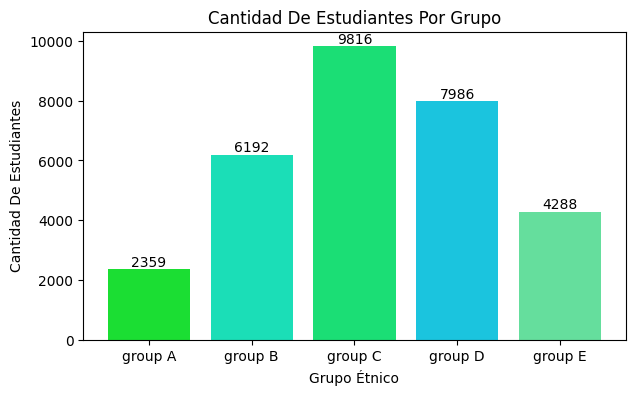

In [10]:
def TotalDeEstudiantes(df, columna):
    plt.figure(figsize=(7,4))
    colores = ["#1BDE33", "#1BDEB7", "#1BDE75", "#1BC4DE", "#65DE9D"]
    
    plt.bar(DF_Agrupado["Grupo Étnico"], DF_Agrupado["Cantidad"], color=colores)
    

    plt.xlabel("Grupo Étnico")
    plt.ylabel("Cantidad De Estudiantes")
    plt.title("Cantidad De Estudiantes Por Grupo")

    for i, valor in enumerate(DF_Agrupado["Cantidad"]):
        plt.text(i, valor, str(valor), ha="center", va="bottom")
      
    plt.savefig("../Gráficas/NúmeroDeEstudiantesPorGrupo.png", dpi=300)    
    plt.show();
    
TotalDeEstudiantes(DF_Agrupado, DF_Agrupado["Cantidad"])

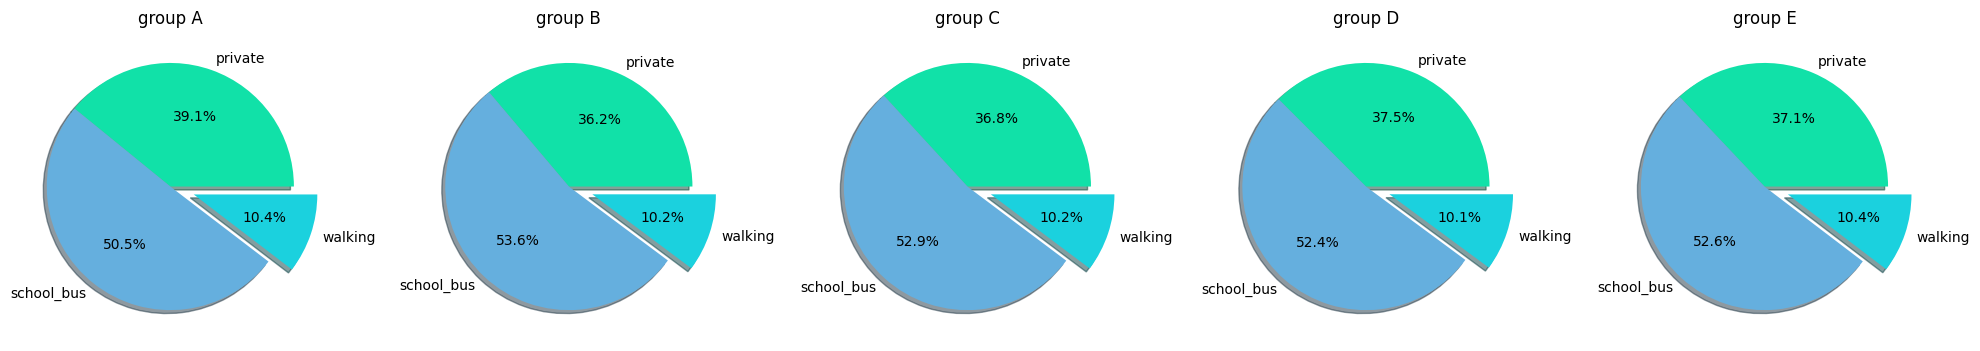

In [11]:

def AlcancePorTransporte(df, columna):
    grupos = TransporteCantidad["Grupo Étnico"].unique()
    fig, ax = plt.subplots(1, len(grupos), figsize=(20, 6))

    for i, g in enumerate(grupos):
        data_g = TransporteCantidad[TransporteCantidad["Grupo Étnico"] == g]
        
        ax[i].pie(
            data_g["Cantidad"],
            labels = data_g["Medio De Transporte"],
            autopct = "%1.1f%%",
            colors = ["#11E1A8", "#65AFDE", "#1BD1DE"],
            shadow=True,
            explode = (0, 0, 0.2)
        )

        ax[i].set_title(g)
        
    plt.tight_layout()
    
    plt.savefig("../Gráficas/AlcancePorTransporte.png", dpi=300)
    plt.show();
    
AlcancePorTransporte(TransporteCantidad, TransporteCantidad["Medio De Transporte"])

Conclusiones:
- El medio de transporte no puede ser el principal factor en el grupo A para que tengan los promedio más bajos en cada materia ya que la mitad del resto de los grupos también utilizan el mismo medio de transporte.

- De hecho el grupo A es el que más se moviliza en medio de transporte privado o propio, tomando en cuanta tambíen que es el grupo con menos estudiantes.

- Puede que el problema este en las horas invertidas a la semana de estudio.

In [8]:
HorasSemanales = NotasEstudiantesDF[["Grupo Étnico", "Horas De Estudio Semanal"]].copy()

DF_Horas_GrupoA = (
    HorasSemanales
    .loc[HorasSemanales["Grupo Étnico"] == "group A"]
    .groupby(["Grupo Étnico", "Horas De Estudio Semanal"])
    .size()
    .reset_index(name="Cantidad") 
)

DF_Horas_GrupoA

,Grupo Étnico,Horas De Estudio Semanal,Cantidad
0,group A,5 - 10,1301
1,group A,< 5,675
2,group A,> 10,383


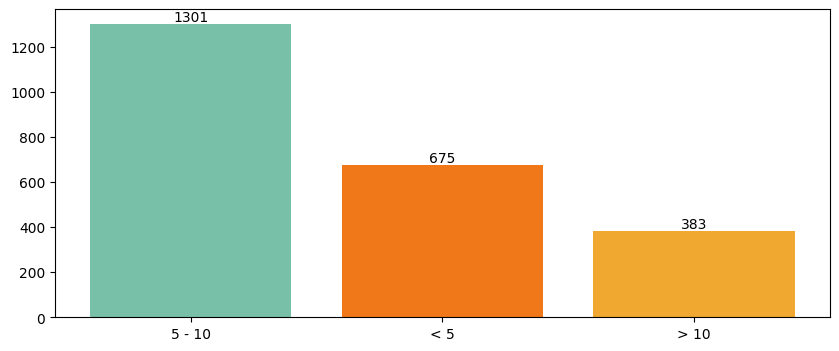

In [19]:
def HorasEstudioGrupoA(df, columna):
    
    plt.figure(figsize=(10,4))
    coloresGrupoA = ["#78C0A8", "#F07818", "#F0A830"]

    plt.bar(DF_Horas_GrupoA["Horas De Estudio Semanal"], DF_Horas_GrupoA["Cantidad"], color=coloresGrupoA)

    for i, valor in enumerate(DF_Horas_GrupoA["Cantidad"]):
        plt.text(i, valor, str(valor), ha="center", va="bottom")

    plt.savefig("../Gráficas/HorasEstudioGrupoA.png", dpi=300)
    plt.show();
    
HorasEstudioGrupoA(DF_Horas_GrupoA, DF_Horas_GrupoA["Cantidad"])

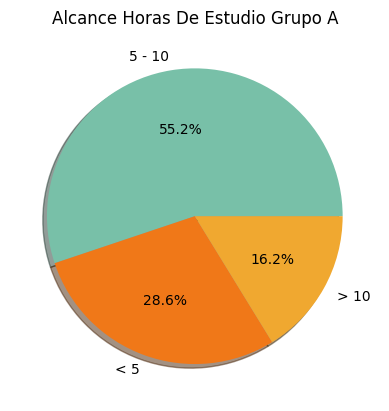

In [37]:
def AlcanceHorasEstudioGrupoA(df, columna):
    plt.pie(
        DF_Horas_GrupoA["Cantidad"],
        labels = DF_Horas_GrupoA["Horas De Estudio Semanal"],
        colors = ["#78C0A8", "#F07818", "#F0A830"],
        autopct = "%1.1f%%",
        shadow = True  
    )

    plt.title("Alcance Horas De Estudio Grupo A")
    
    plt.savefig("../Gráficas/AlcanceHorasEstudioGrupoA.png", dpi=300)
    plt.show();

AlcanceHorasEstudioGrupoA(DF_Horas_GrupoA, DF_Horas_GrupoA["Horas De Estudio Semanal"])